# 🔹 UFC Model Experiments

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

## 1. Import Libraries and Setup Environment

In [2]:
# Import necessary libraries
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get the current working directory
current_dir = os.getcwd()

# Navigate to the project root
project_root = os.path.abspath(os.path.join(current_dir, '..'))

# Import from /src

sys.path.append(os.path.join(project_root, 'src'))
from utils.metrics import *
from models.model_factory import model_factory
from models.ufc_model import UFCModel
from utils.ufc_data import UFCData
from models.config import *
from utils.io_model import load_data, load_model
from utils.helpers import *

# Define the path to the CSV file
train_path = os.path.join(project_root, 'data', 'processed', 'ufc_train.csv')
test_path = os.path.join(project_root, 'data', 'processed', 'ufc_test.csv')

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

## 2. Load Data

In [2]:
# Load the CSV into a DataFrame
try:
    ufc_train = pd.read_csv(train_path)
    print_header(f"Data Training successfully loaded: {ufc_train.shape[0]} rows, {ufc_train.shape[1]} columns.", color='bright_green')
except Exception as e:
    print_header(f"Error loading training data: {e}", color='bright_red')

╔═════════════════════════════════════════════════════════════╗
║  Data Training successfully loaded: 5232 rows, 47 columns.  ║
╚═════════════════════════════════════════════════════════════╝


In [3]:
try:
    ufc_test = pd.read_csv(test_path)
    print_header(f"Data Testing successfully loaded: {ufc_test.shape[0]} rows, {ufc_test.shape[1]} columns.", color='bright_green')
except Exception as e:
    print_header(f"Error loading testing data: {e}", color='bright_red')

╔════════════════════════════════════════════════════════════╗
║  Data Testing successfully loaded: 1309 rows, 47 columns.  ║
╚════════════════════════════════════════════════════════════╝


<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

## 3. Load Models

In [4]:
model_list = [UFCModel(model=load_model(name, verbose=True)) for name in pretty_model_name]

📦 Model Logistic Regression loaded from: /home/mfourier/ufc-predictor/models/lr_best.pkl
📦 Model Random Forest loaded from: /home/mfourier/ufc-predictor/models/rf_best.pkl
📦 Model Support Vector Machine loaded from: /home/mfourier/ufc-predictor/models/svm_best.pkl
📦 Model K-Nearest Neighbors loaded from: /home/mfourier/ufc-predictor/models/knn_best.pkl
📦 Model AdaBoost loaded from: /home/mfourier/ufc-predictor/models/ab_best.pkl
📦 Model Naive Bayes loaded from: /home/mfourier/ufc-predictor/models/nb_best.pkl
📦 Model Extra Trees loaded from: /home/mfourier/ufc-predictor/models/et_best.pkl
📦 Model Gradient Boosting loaded from: /home/mfourier/ufc-predictor/models/gb_best.pkl
📦 Model Quadratic Discriminant Analysis loaded from: /home/mfourier/ufc-predictor/models/qda_best.pkl


<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

## 4. Evaluate Models

In [5]:
for model in model_list:
    model.metrics = evaluate_metrics(model, ufc_test)
    model.cm = evaluate_cm(model, ufc_test)

## 5. Check Models

### Metrics Comparison

In [6]:
model_metrics = compare_metrics(model_list)

INFO:utils.metrics:Starting comparison of models...
INFO:utils.metrics:Evaluating: Logistic Regression
INFO:utils.metrics:Evaluating: Random Forest
INFO:utils.metrics:Evaluating: Support Vector Machine
INFO:utils.metrics:Evaluating: K-Nearest Neighbors
INFO:utils.metrics:Evaluating: AdaBoost
INFO:utils.metrics:Evaluating: Naive Bayes
INFO:utils.metrics:Evaluating: Extra Trees
INFO:utils.metrics:Evaluating: Gradient Boosting
INFO:utils.metrics:Evaluating: Quadratic Discriminant Analysis


╔════════════════════════╗
║  Comparison Completed  ║
╚════════════════════════╝


In [7]:
display(model_metrics)

,Accuracy,Precision,Recall,F1 Score,ROC AUC,Brier Score
Model,,,,,,
Logistic Regression,0.6280,0.6113,0.3145,0.4154,0.6670,0.2231
Random Forest,0.6134,0.6038,0.2327,0.3360,0.6316,0.2311
Support Vector Machine,0.6104,0.5962,0.2255,0.3272,0.6249,0.2319
K-Nearest Neighbors,0.5462,0.4522,0.3782,0.4119,0.5515,0.2663
AdaBoost,0.6073,0.5559,0.3255,0.4106,0.6327,0.2344
Naive Bayes,0.5982,0.5276,0.4164,0.4654,0.5829,0.2743
Extra Trees,0.5943,0.5487,0.1945,0.2872,0.6009,0.2350
Gradient Boosting,0.6173,0.6140,0.2400,0.3451,0.6319,0.2311
Quadratic Discriminant Analysis,0.5913,0.5170,0.4145,0.4601,0.6070,0.2453


### Best Model per Metric

In [8]:
best_models_df = best_model_per_metric(model_metrics)
display(best_models_df)

INFO:utils.metrics:Best model for Accuracy: Logistic Regression (0.6280)
INFO:utils.metrics:Best model for Precision: Gradient Boosting (0.6140)
INFO:utils.metrics:Best model for Recall: Naive Bayes (0.4164)
INFO:utils.metrics:Best model for F1 Score: Naive Bayes (0.4654)
INFO:utils.metrics:Best model for ROC AUC: Logistic Regression (0.6670)
INFO:utils.metrics:Best model for Brier Score: Naive Bayes (0.2743)


,Metric,Best Model,Value
0,Accuracy,Logistic Regression,0.6280
1,Precision,Gradient Boosting,0.6140
2,Recall,Naive Bayes,0.4164
3,F1 Score,Naive Bayes,0.4654
4,ROC AUC,Logistic Regression,0.6670
5,Brier Score,Naive Bayes,0.2743


### Model Performance Comparison

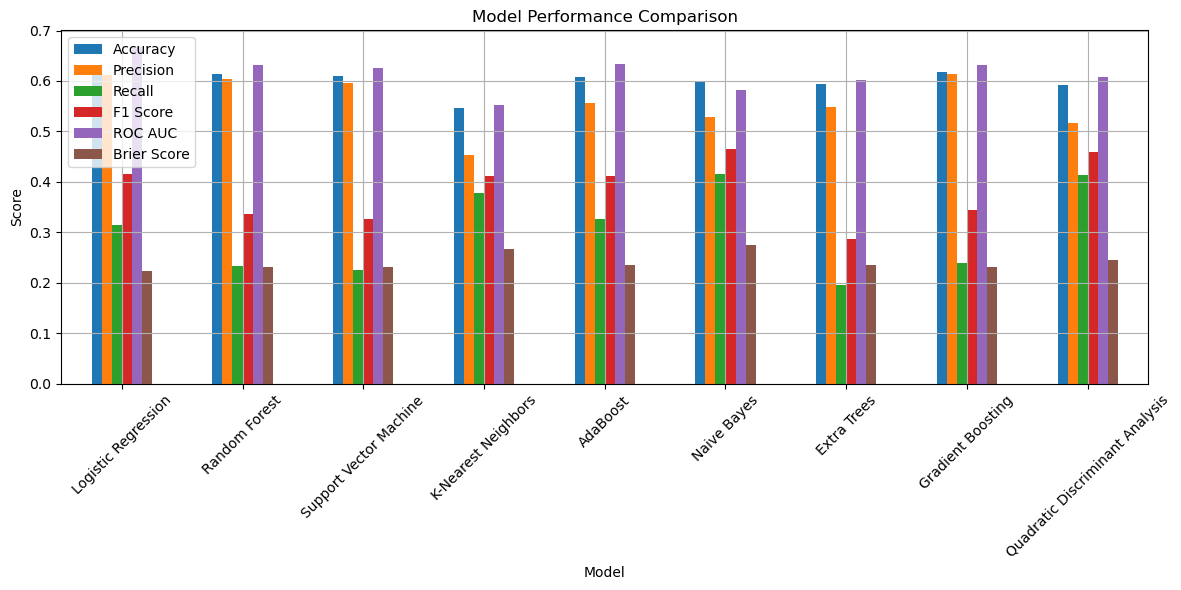

In [13]:
# Bar-plot per metric
model_metrics.plot(kind='bar', figsize=(12,6), title='Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

<div style="text-align: center;">
     <img src="../img/ufc_logo.png" width="800" /> 
</div>